In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score, confusion_matrix,roc_auc_score,classification_report
from sklearn.multiclass import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
pd.set_option('display.max_columns', None)
from matplotlib.patches import Patch
import os 
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
path="../../Data/"
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data_cleaning import processing_functions as pfs
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from src.data_cleaning import useful_viz
path="../../Data/"

In [5]:
df = pd.read_csv('../../Data/training_set_values.csv',dtype={"permit":"string","public_meeting":"string"})
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,<NA>,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
target_df=pd.read_csv(path+'training_set_labels.csv')
target_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [7]:
from sklearn.preprocessing import LabelEncoder
sle = LabelEncoder()
status_encoded = sle.fit_transform(target_df['status_group'])
status_df=pd.DataFrame(status_encoded)
status_encoded_map = {index: label for index, label in 
                                       enumerate(sle.classes_)}

In [8]:
merged_df=df.merge(target_df,on="id",how="inner")
merged_df["stauts_encoded"]=status_df
merged_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,stauts_encoded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,<NA>,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0


In [12]:
merged_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [9]:
status_df.rename(columns={"0": "Functionality"},inplace=True)
merged_df["stauts_encoded"]=status_df

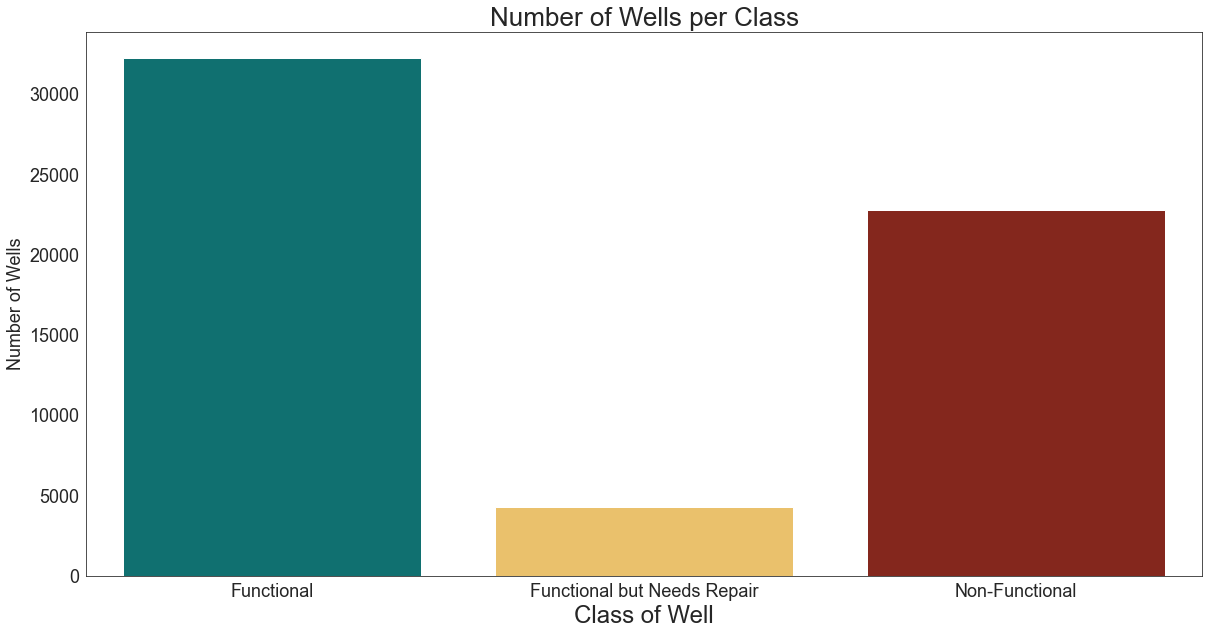

In [7]:
sns.set_style(style="white")
plt.figure(figsize=(20, 10))
sns.barplot(x=["Functional","Functional but Needs Repair","Non-Functional"],y=[32259,4317,22824],palette=[);
plt.title("Number of Wells per Class",fontsize=26);
plt.ylabel("Number of Wells",fontsize=18)
plt.xlabel("Class of Well",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);
plt.savefig('../../reports/figures/Wellsgrouping.png', transparent=True,dpi=300, bbox_inches = "tight")


In [8]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [9]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [10]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [11]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [12]:
df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [13]:
re=list(df.quantity.value_counts())

In [14]:
re=list(df.quantity.unique())

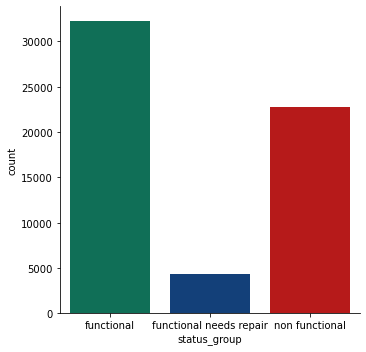

In [22]:
sns_plot= sns.catplot("status_group",
                data=merged_df,
                kind="count", aspect=1,legend=True,legend_out=True, order=["functional","functional needs repair","non functional"],palette=["#007f5f",'#023e8a',"#d00000"]);
sns_plot.savefig('../../reports/figures/Wellsgroupingalt.png', transparent=True,dpi=300, bbox_inches = "tight")

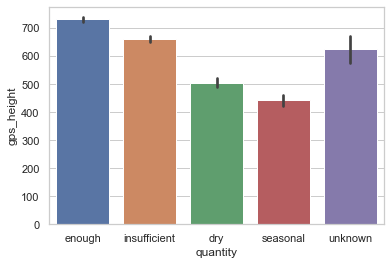

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.barplot(x="quantity", y="gps_height",data=merged_df )

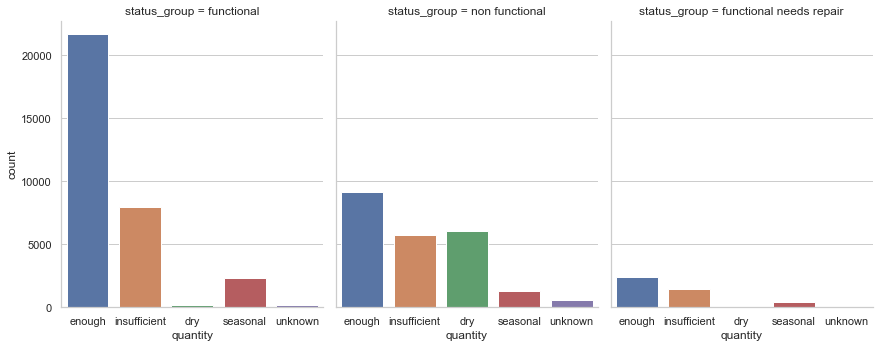

In [17]:
sns.catplot("quantity", col="status_group", col_wrap=4,
                data=merged_df,
                kind="count", aspect=.8);

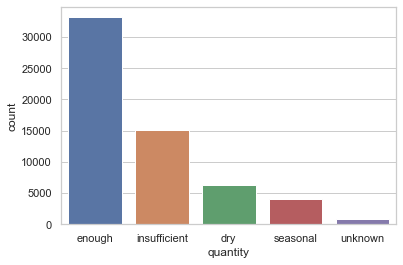

In [18]:
sns.countplot(x="quantity", data=merged_df)


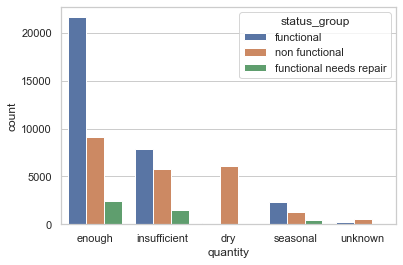

In [19]:
sns.countplot(x="quantity", hue="status_group", data=merged_df)

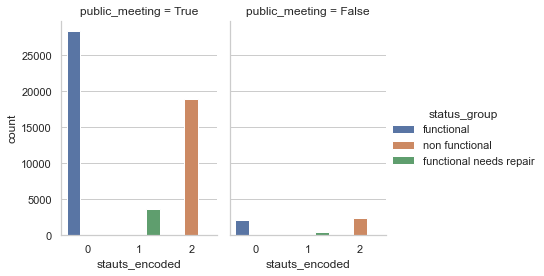

In [20]:
sns.catplot(x="stauts_encoded", hue="status_group", col="public_meeting",
                data=merged_df, kind="count",
                height=4, aspect=.7);


stack this

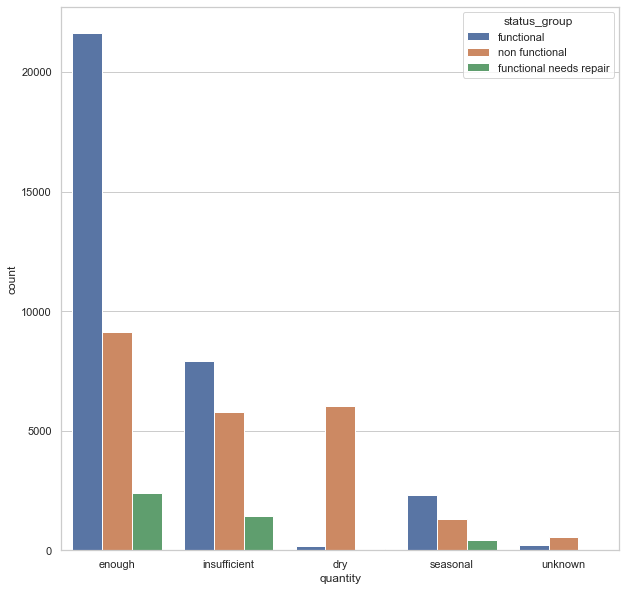

In [21]:
plt.figure(figsize=(10, 10))
sns.countplot(x="quantity", hue="status_group", data=merged_df);

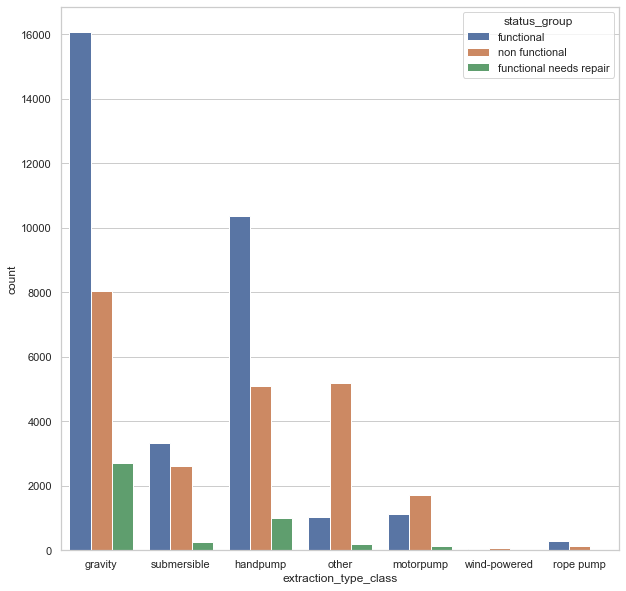

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x="extraction_type_class", hue="status_group", data=merged_df)

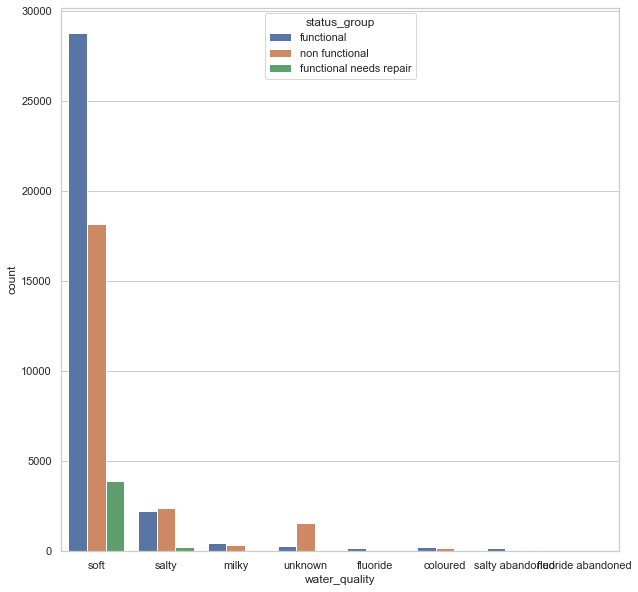

In [24]:
plt.figure(figsize=(10, 10))
sns.countplot(x="water_quality", hue="status_group", data=merged_df)

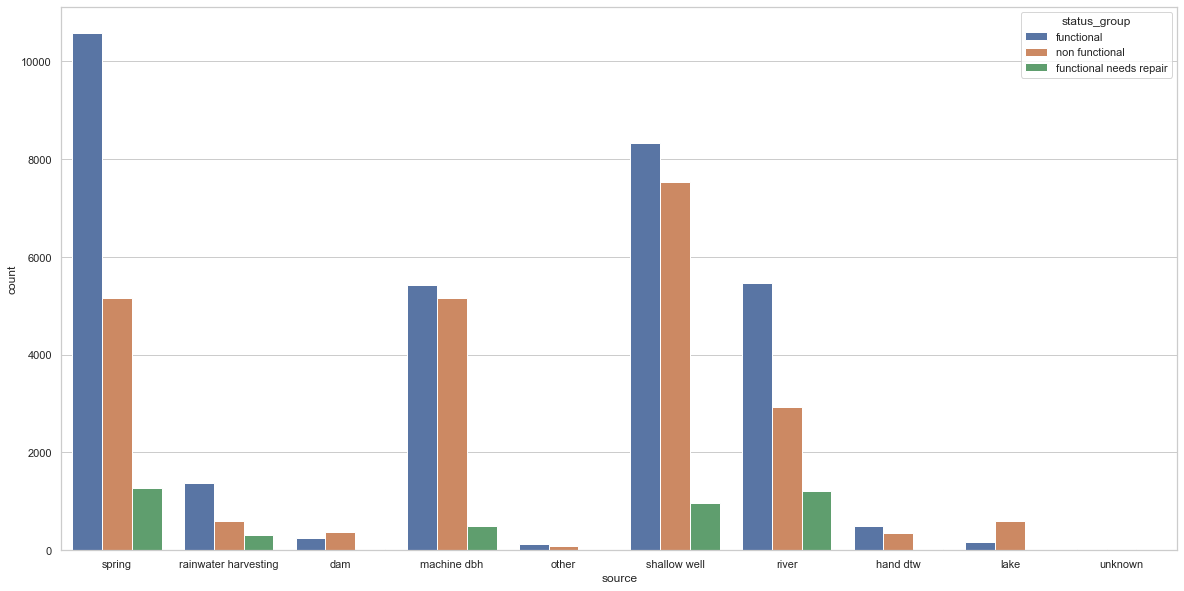

In [25]:
plt.figure(figsize=(20, 10))

sns.countplot(x="source", hue="status_group", data=merged_df)

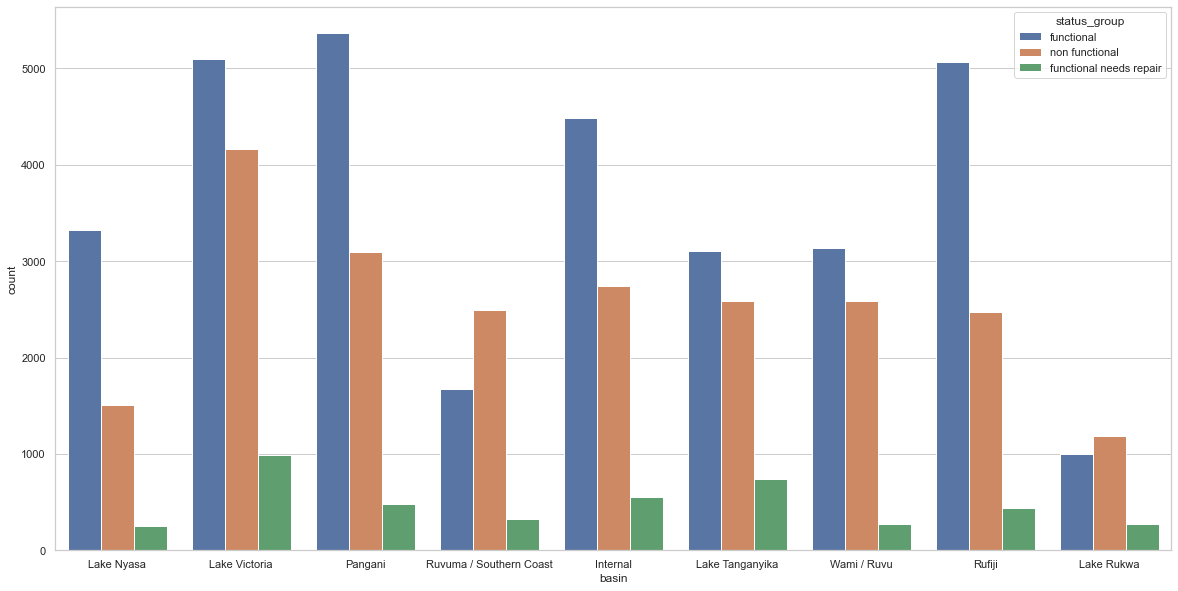

In [26]:
plt.figure(figsize=(20, 10))

sns.countplot(x="basin", hue="status_group", data=merged_df)

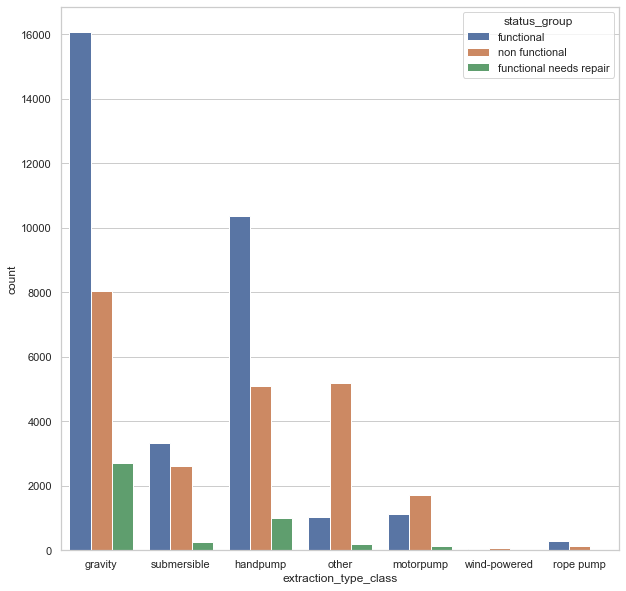

In [27]:
plt.figure(figsize=(10, 10))
sns.countplot(x="extraction_type_class", hue="status_group", data=merged_df)

In [28]:
sns.set()
merged_df.set_index("status_groups").T.plot(kind='bar', stacked=True)

KeyError: "None of ['status_groups'] are in the columns"

In [30]:
counts_df = merged_df.groupby(["status_group", "quantity"])["stauts_encoded"].count().unstack()
counts_df

quantity,dry,enough,insufficient,seasonal,unknown
status_group,,,,,
functional,157,21648,7916,2325,213
functional needs repair,37,2400,1450,416,14
non functional,6052,9138,5763,1309,562


In [31]:
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

status_group,functional,functional needs repair,non functional
quantity,,,
dry,0.025136,0.005924,0.968940
enough,0.652323,0.072320,0.275357
insufficient,0.523234,0.095842,0.380924
seasonal,0.574074,0.102716,0.323210
unknown,0.269962,0.017744,0.712294


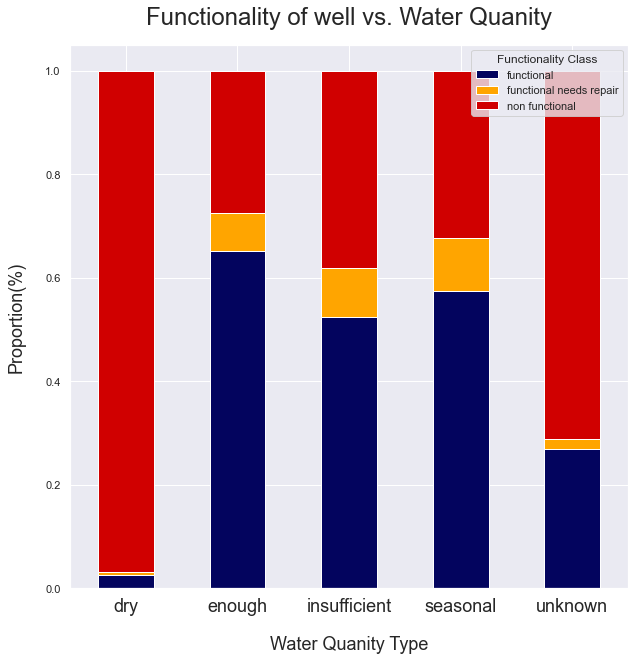

In [53]:
fig, ax = plt.subplots()
sns_plot1=pclass_percents_df.plot(kind="bar", stacked=True, color=["#03045e", "orange", "#d00000"], figsize=(10,10),ax=ax)

ax.legend(title="Functionality Class",loc="upper right")
ax.set_xlabel("Water Quanity Type",fontsize=18,labelpad=20)
ax.set_ylabel("Proportion(%)",fontsize=18,labelpad=20)
ax.tick_params(axis='x', labelsize=18,labelrotation=0)
ax.set_title("Functionality of well vs. Water Quanity",fontsize=24,pad=20);
# sns_plot1.savefig('../../reports/figures/Wells&waterquanity.png', transparent=True,dpi=300, bbox_inches = "tight")
ax.figure.savefig('../../reports/figures/Wells&waterquanity.png',transparent=True)

# Dry running of the pump can damage the mechanical seal and the motor

In [47]:
counts_df2 = merged_df.groupby(["status_group", "extraction_type_class"])["stauts_encoded"].count().unstack()
counts_df2

extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
status_group,,,,,,,
functional,16048,10375,1135,1029,293,3329,50
functional needs repair,2701,995,138,206,17,253,7
non functional,8031,5086,1714,5195,141,2597,60


In [48]:
pclass_percents_df2 = counts_df2.div(counts_df2.sum()).T
pclass_percents_df2

status_group,functional,functional needs repair,non functional
extraction_type_class,,,
gravity,0.599253,0.100859,0.299888
handpump,0.630469,0.060464,0.309067
motorpump,0.379980,0.046200,0.573820
other,0.160031,0.032037,0.807932
rope pump,0.649667,0.037694,0.312639
submersible,0.538760,0.040945,0.420295
wind-powered,0.427350,0.059829,0.512821


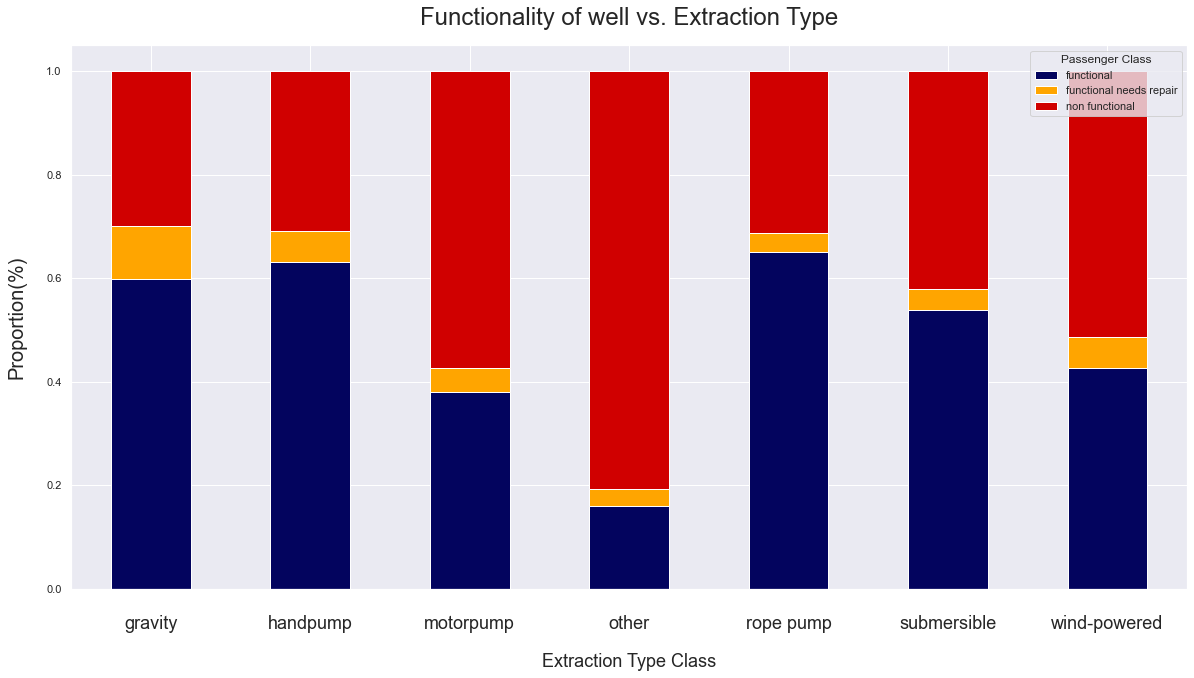

In [57]:
fig, ax = plt.subplots()

pclass_percents_df2.plot(kind="bar", stacked=True, color=["#03045e", "orange", "#d00000"], figsize=(20,10),ax=ax)

ax.legend(title="Passenger Class",loc='upper right')
ax.set_xlabel("Extraction Type Class",fontsize=18,labelpad=20)
ax.set_ylabel("Proportion(%)",fontsize=20,labelpad=20)
ax.tick_params(axis='x',labelsize=18, labelrotation=0,pad=20)
ax.set_title("Functionality of well vs. Extraction Type",fontsize=24,pad=20);
ax.figure.savefig('../../reports/figures/Wells&Extractiontype.png',transparent=True)